# Question: 
1. Write a python program for generating a composite signal (you could use sine or cosine waves). The parameters including the signal frequencies of 40 Hz, 80 Hz, 160 Hz with the amplidute 10, 20, 40 respectively, and the signal length should be limited to 512 in samples.
2. Plot the generated signal 
3. Do standard sampling by following the Nyquist rate.
4. Perform under sampling and over sampling too. Use subplot function to show the original, sampled, under sampled, and over sampled signal.
5. Then perform N=512 point DFT, show the magnitude and phase spectrum.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

512


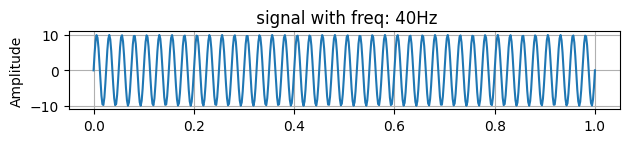

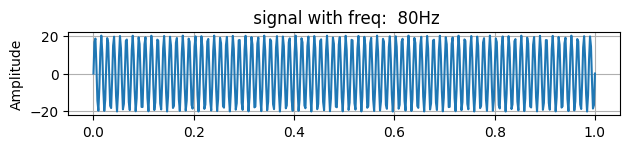

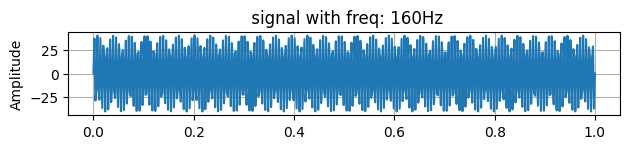

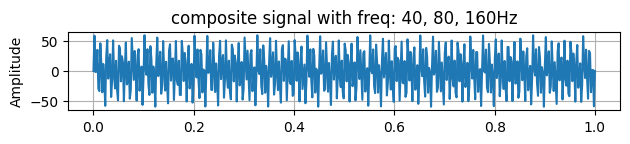

In [17]:
# signals
a1, a2, a3 = 10, 20, 40
f1, f2, f3 = 40, 80, 160

t = np.linspace(0, 1, 512)
print(len(t))

x1 = a1 * np.sin(2 * np.pi * f1 * t)
x2 = a2 * np.sin(2 * np.pi * f2 * t)
x3 = a3 * np.sin(2 * np.pi * f3 * t)

x = x1 + x2 + x3

plt.subplot(4, 1, 1)
plt.plot(t, x1)
plt.title(" signal with freq: 40Hz")
plt.xlabel("")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.grid(True)
plt.show(True)

plt.subplot(4, 1, 2)
plt.plot(t, x2)
plt.title(" signal with freq:  80Hz")
plt.xlabel("")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.grid(True)
plt.show(True)

plt.subplot(4, 1, 3)
plt.plot(t, x3)
plt.title(" signal with freq: 160Hz")
plt.xlabel("")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.grid(True)
plt.show(True)

plt.subplot(4, 1, 4)
plt.plot(t, x)
plt.title("composite signal with freq: 40, 80, 160Hz")
plt.xlabel("")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show(True)




320
300
1024


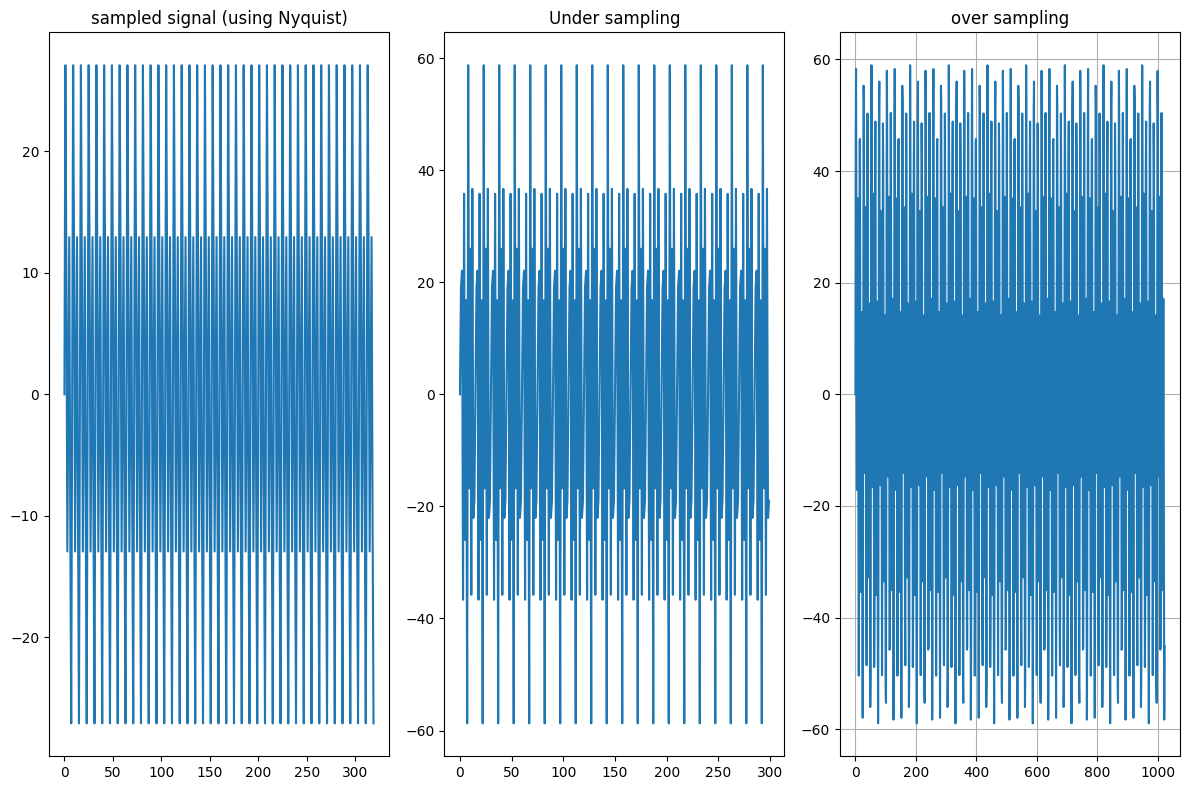

In [27]:
# sampling

fs = 1 / 320

ts = np.arange(0, 1, fs)
print(len(ts))

x1s = a1 * np.sin(2 * np.pi * f1 * ts)
x2s = a2 * np.sin(2 * np.pi * f2 * ts)
x3s = a3 * np.sin(2 * np.pi * f3 * ts)

xs = x1s + x2s + x3s

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
# plt.axis([0, 1, -60, 60])
plt.plot(xs)
plt.title("sampled signal (using Nyquist)")


# Under Sampling 
fs = 1 / 300

ts = np.arange(0, 1, fs)
print(len(ts))

x1s_under = a1 * np.sin(2 * np.pi * f1 * ts)
x2s_under = a2 * np.sin(2 * np.pi * f2 * ts)
x3s_under = a3 * np.sin(2 * np.pi * f3 * ts)

xs_under = x1s_under + x2s_under + x3s_under

plt.subplot(1, 3, 2)
# plt.axis([0, 1, -60, 60])
plt.plot(xs_under)
plt.title("Under sampling")



# Over Sampling 
fs = 1 / (1024)

ts = np.arange(0, 1, fs)
print(len(ts))

x1s_over = a1 * np.sin(2 * np.pi * f1 * ts)
x2s_over = a2 * np.sin(2 * np.pi * f2 * ts)
x3s_over = a3 * np.sin(2 * np.pi * f3 * ts)

xs_over = x1s_over + x2s_over + x3s_over

plt.subplot(1, 3, 3)
# plt.axis([0, 1, -60, 60])
plt.plot(xs_over)
plt.title("over sampling")


plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for m in range(N):
        for n in range(N):
            X[m] += x[n] * np.exp(-2j * np.pi * m * n / N)

    return X

In [21]:
def inverse_dft(X):
    N = len(X)
    x = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for m in range(N):
            x[n] += X[m] * np.exp(2j * np.pi * n * m / N)
        x[n] = x[n] / N

    return x

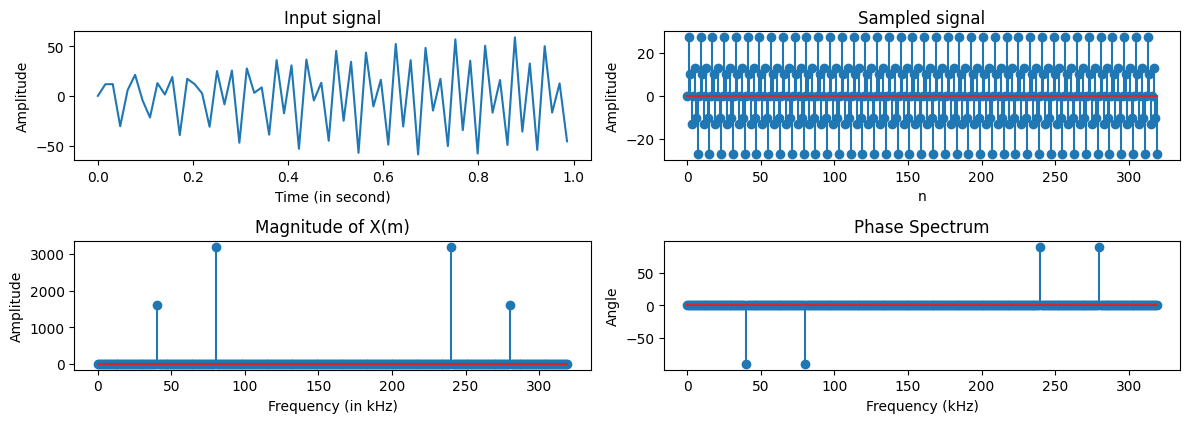

In [40]:
# DFT

N = 512
t = np.linspace(0, 1, 512)

plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(t[::8], x[::8])
plt.ylabel("Amplitude")
plt.xlabel("Time (in second)")
plt.title("Input signal")

fs = 512
t = np.arange(0, 1, 1/fs)
x_sampled = xs[:N]
# print(x_sampled)


plt.subplot(3, 2, 2)
plt.stem(x_sampled)
# plt.plot(range(N), x_sampled)
plt.ylabel("Amplitude")
plt.xlabel("n")
plt.title("Sampled signal")
# print(x_sampled)

X = dft(x_sampled)
# print(np.round(X.real, 2) + np.round(X.imag, 2) * 1j)

plt.subplot(3, 2, 3)
plt.stem(np.abs(X))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (in kHz)")
plt.title("Magnitude of X(m)")

# X_phase = []
# for z in X:
#     temp = cm.phase(round(z.real) + round(z.imag) * 1j)
#     X_phase.append(math.degrees(temp))
# # print(X_phase)

X_rounded = np.array([round(z.real) + round(z.imag) * 1j for z in X])
X_phase = np.angle(X_rounded, deg=True)

plt.subplot(3, 2, 4)
plt.stem(X_phase)
plt.ylabel("Angle")
plt.xlabel("Frequency (kHz)")
plt.title("Phase Spectrum")


plt.tight_layout()
plt.show()